In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**nltk** is Natural Language Toolkit, used for text processing.

In [3]:
import nltk

# Collecting dataset

In [4]:
email_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/spam.csv')
email_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
email_df.rename(columns = {'v1': 'class', 'v2': 'message'}, inplace = True)
email_df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Analyzing data

In [6]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5522 entries, 0 to 5521
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5522 non-null   object
 1   message  5522 non-null   object
dtypes: object(2)
memory usage: 86.4+ KB


In [7]:
email_df.isnull().sum()

class      0
message    0
dtype: int64

In [8]:
email_df.describe()

,class,message
count,5522,5522
unique,2,5126
top,ham,"Sorry, I'll call later"
freq,4780,30


ham     4780
spam     742
Name: class, dtype: int64



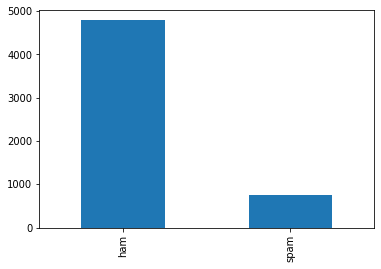

In [9]:
# other kind's value 
'''
df.plot.area     df.plot.barh     df.plot.density  df.plot.hist     df.plot.line
df.plot.scatter  df.plot.bar      df.plot.box      df.plot.hexbin   df.plot.kde
df.plot.pie
'''
email_df['class'].value_counts().plot(kind = 'bar')
print(email_df['class'].value_counts(), end='\n\n')

# Data preparation

**Removing Special Characters**

In [10]:
import string
# string.punctuation

In [11]:
# function to remove punctuation
def remove_punctuation(text):
  punctuation_free_text = "".join([i for i in text if i not in string.punctuation])
  return punctuation_free_text

# storing the punctuation free text
email_df['message'] = email_df['message'].apply(lambda x: remove_punctuation(x))

**Lowering the text**

In [12]:
email_df['message'] = email_df['message'].apply(lambda x: x.lower())

**Tokenization**

SYNTAX:

      re.split(pattern, string, maxsplit=0, flags=0)

In [13]:
import re # Regular Expression

# function for tokenization
def tokenization(text):
  # The \W is a regex special sequence that matches any Non-alphanumeric character.
  # Non-alphanumeric means no letter, digit, and underscore.
  tokens = re.split('W+', text)
  return tokens

# applying function to the column
email_df['msg_tokens'] = email_df['message'].apply(lambda x: tokenization(x))

**Removing Stopwords**

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# stopwords present in the library
stopwords = stopwords.words('english')

for x in stopwords:
  print(x, end=', ')
print('\n')

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# functio to remove stopwords from tokenized text
def remove_stopwords(text):
  output = [i for i in text if i not in stopwords]
  return output

email_df['tokens_without_stopwords'] = email_df['msg_tokens'].apply(lambda x: remove_stopwords(x))

**Stemming**

In [16]:
# importing the stemming function from nltk library
from nltk.stem.porter import PorterStemmer
# defining the object for stemming
stemmer = PorterStemmer()

# function for stemming
def stemming(text):
  stem_text = [stemmer.stem(word) for word in text]
  return stem_text

email_df['msg_stemmed'] = email_df['tokens_without_stopwords'].apply(lambda x: stemming(x))

In [17]:
email_df.head()

,class,message,msg_tokens,tokens_without_stopwords,msg_stemmed
0,ham,go until jurong point crazy available only in ...,[go until jurong point crazy available only in...,[go until jurong point crazy available only in...,[go until jurong point crazy available only in...
1,ham,ok lar joking wif u oni,[ok lar joking wif u oni],[ok lar joking wif u oni],[ok lar joking wif u oni]
2,spam,free entry in 2 a wkly comp to win fa cup fina...,[free entry in 2 a wkly comp to win fa cup fin...,[free entry in 2 a wkly comp to win fa cup fin...,[free entry in 2 a wkly comp to win fa cup fin...
3,ham,u dun say so early hor u c already then say,[u dun say so early hor u c already then say],[u dun say so early hor u c already then say],[u dun say so early hor u c already then say]
4,ham,nah i dont think he goes to usf he lives aroun...,[nah i dont think he goes to usf he lives arou...,[nah i dont think he goes to usf he lives arou...,[nah i dont think he goes to usf he lives arou...


# Model Training

In [49]:
import nltk
nltk.download(['punkt', 'stopwords', 'wordnet'])

import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


The Porter stemming algorithm is a process for removing the commoner morphological and inflexional edings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up information retrievel systems.

In [51]:
ps = PorterStemmer()
lemmatize = WordNetLemmatizer()

corpus = []

for i in range(len(email_df)):
  msg = re.sub('[^a-zA-Z]', '', email_df['message'][i])
  msg = msg.lower()
  msg = msg.split()
  msg = [ps.stem(word) for word in msg if word not in stopwords.words('english')]
  msg = ''.join(msg)
  corpus.append(msg)

CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(corpus).toarray()
y = pd.get_dummies(email_df['class']) 
y = y.iloc[:,1].values

**Splitting dataset**

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=48)
print('shape of X_train', X_train.shape)
print('shape of y_train', y_train.shape)
print('shape of X_test', X_test.shape)
print('shape of y_test', y_test.shape)

shape of X_train (4417, 2000)
shape of y_train (4417,)
shape of X_test (1105, 2000)
shape of y_test (1105,)


**Naive Bayes**

In [85]:
from sklearn.naive_bayes import MultinomialNB

text_clf = MultinomialNB()
text_clf.fit(X_train, y_train)

MultinomialNB()

In [86]:
y_pred = text_clf.predict(X_test)

# Accuracy

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred), end='\n\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred), end='\n\n')
print('Classification Report :\n', classification_report(y_test, y_pred))

Confusion Matrix :
 [[963   0]
 [137   5]]

Accuracy Score : 0.8760180995475113

Classification Report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       963
           1       1.00      0.04      0.07       142

    accuracy                           0.88      1105
   macro avg       0.94      0.52      0.50      1105
weighted avg       0.89      0.88      0.82      1105



      Ham  - 0
      Spam - 1